In [5]:
import sys, os
sys.path.insert(0, os.getcwd())
sys.path.insert(0, os.path.dirname(os.getcwd()))
sys.path.insert(0,os.path.join(os.path.dirname(os.getcwd()), "testing"))
from testing.isi_corr import *

def dnn_vs_um(mt_path:str):
    mt = pd.read_csv(mt_path)
    sessions = set(mt["RecSes1"].unique())
    dnn_auc, um_auc, numbers_d, numbers_u = [], [], [], []
    for r1 in tqdm(sessions):
        for r2 in tqdm(sessions):
            if r1>=r2:
                continue
            dnn, um, n_dnn, n_um = auc_one_pair(mt, r1, r2, mt_path=mt_path, dist_thresh=20)
            if dnn is not None and um is not None:
                dnn_auc.append(dnn)
                numbers_d.append(n_dnn)
                um_auc.append(um)
                numbers_u.append(n_um)
    return dnn_auc, numbers_d, um_auc, numbers_u



In [35]:
test_data_root = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "R_DATA_UnitMatch")
mt_path = os.path.join(test_data_root, "AL036", "19011116882", "3", "new_matchtable.csv")
mt = pd.read_csv(mt_path)

dnn_auc, numbers_d, um_auc, numbers_u = dnn_vs_um(mt_path)

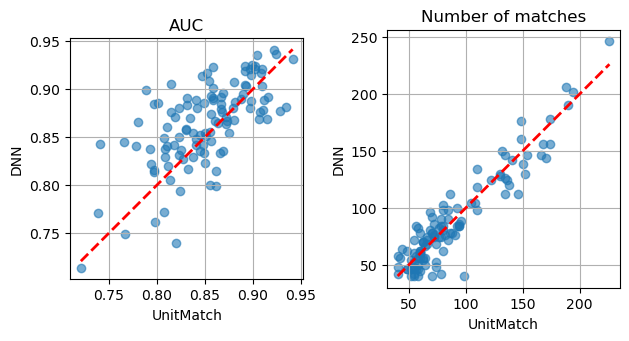

In [55]:
fig = plt.figure()
ax1 = fig.add_subplot(121, aspect='equal')
ax1.scatter(um_auc, dnn_auc, alpha=0.6)
ax1.plot([min(um_auc), max(um_auc)], [min(um_auc), max(um_auc)], 'r--', lw=2)
ax1.grid()
ax1.set(title="AUC", xlabel="UnitMatch", ylabel="DNN")
ax2 = fig.add_subplot(122, aspect='equal')
ax2.scatter(numbers_u, numbers_d, alpha=0.6)
ax2.plot([min(numbers_u), max(numbers_u)], [min(numbers_u), max(numbers_u)], 'r--', lw=2)
ax2.grid()
ax2.set(title="Number of matches", xlabel="UnitMatch", ylabel="DNN")
fig.tight_layout()
plt.show()

In [52]:
sessions = mt["RecSes1"].unique()

mat = np.zeros((len(sessions), len(sessions)))

for i, j in tqdm(np.ndindex(mat.shape), total=len(sessions)**2):
    small=mt.loc[(mt["RecSes1"].isin([sessions[i],sessions[j]])) & (mt["RecSes2"].isin([sessions[i],sessions[j]])),:]
    med = np.median(small["DNNSim"])
    mat[i,j] = med


100%|██████████| 441/441 [00:29<00:00, 15.20it/s]


Text(0.5, 1.0, 'DNNSim medians for AL036 sessions')

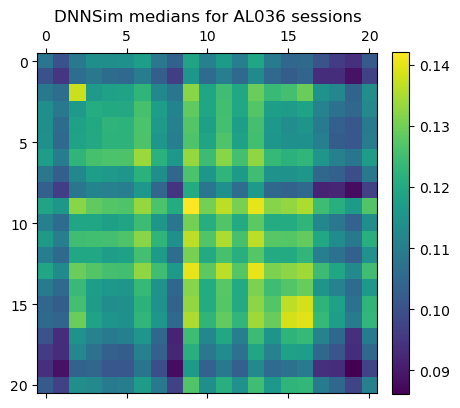

In [57]:

cax = plt.matshow(mat)
plt.colorbar(cax,fraction=0.046, pad=0.04)
plt.title("DNNSim medians for AL036 sessions")